In [1]:
from PIL import Image
from IPython.display import display
import os
import random

# path to dataset
dataset_dir = r'C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification'

# path to training and validation datasets
train_dir = os.path.join(dataset_dir, 'Training Data')
val_dir = os.path.join(dataset_dir, 'Validation Data')

Image 1: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Training Data\Mountain\Mountain (2969).jpeg


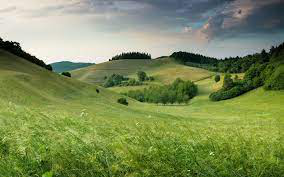

Image 2: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Training Data\Mountain\Mountain (2970).jpeg


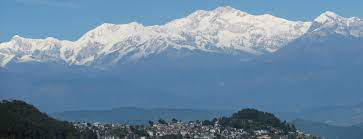

Image 3: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Training Data\Mountain\Mountain (2971).jpeg


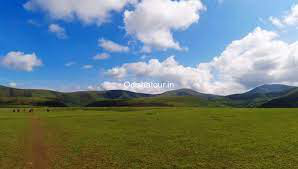

Image 4: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Training Data\Mountain\Mountain (2973).jpeg


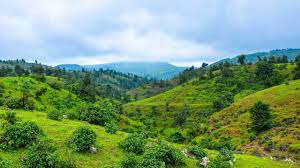

Image 5: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Training Data\Mountain\Mountain (2975).jpeg


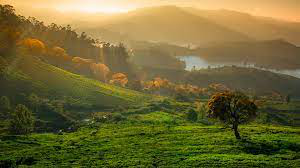

Image 1: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Validation Data\Glacier\Glacier-Valid (1).jpeg


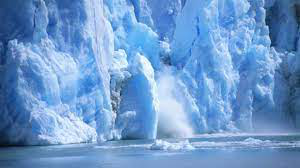

Image 2: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Validation Data\Glacier\Glacier-Valid (10).jpeg


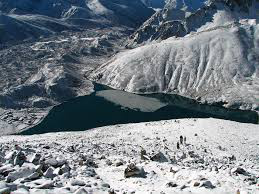

Image 3: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Validation Data\Glacier\Glacier-Valid (100).jpeg


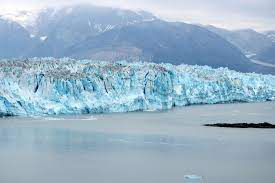

Image 4: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Validation Data\Glacier\Glacier-Valid (101).jpeg


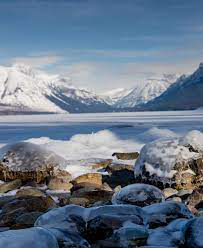

Image 5: C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Validation Data\Glacier\Glacier-Valid (102).jpeg


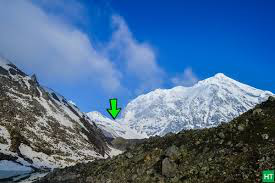

In [3]:
# Function to display first 5 images from a given directory

def display_first_n_images(directory,n=5):
    folders = os.listdir(directory)
    folder = random.choice(folders)
    folder_path = os.path.join(directory, folder)
    image_files = os.listdir(folder_path)
    num_images = min(n, len(image_files))

    for i in range(num_images):
        image_path = os.path.join(folder_path, image_files[i])
        img = Image.open(image_path)
        print(f"Image {i+1}: {image_path}")
        display(img)
    
display_first_n_images(train_dir, 5)
display_first_n_images(val_dir,5)


Found 10000 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.

Training Batch


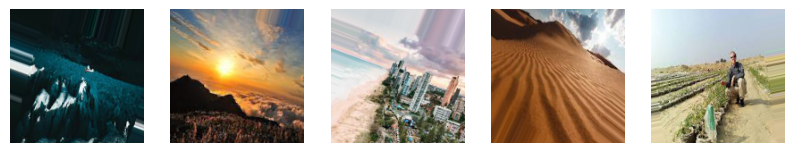

Validation Batch


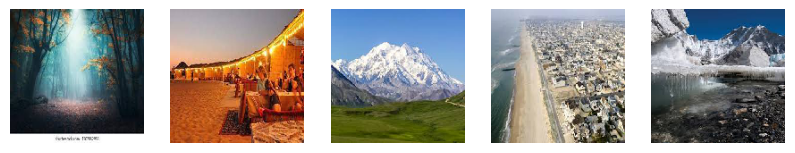

In [5]:
# Data augmentation using cnn

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Loading first 5 augmented images from the training generator
sample_batch = next(train_generator)
sample_images = sample_batch[0]

print("\nTraining Batch")
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

# Loading first 5 augmented images from the validation generator
sample_batch = next(validation_generator)
sample_images = sample_batch[0]

print("Validation Batch")
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

In [7]:
# To apply pre-proccessing and feature extractions to data and labels from the directory using knn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

data = []
labels = []
img_size = (100,100)

def load_images_from_directory(directory):
    for folders in os.listdir(directory):
        folder = os.path.join(directory, folders)
        if os.path.isdir(folder):
            for img_name in os.listdir(folder):
                img_path = os.path.join(folder, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    flattened_image = img.flatten()
                    data.append(flattened_image)
                    labels.append(folders)
                    
    return np.array(data), np.array(labels)

In [9]:
# Load training and validation data

train_data, train_labels = load_images_from_directory(train_dir)
validation_data, validation_labels = load_images_from_directory(val_dir)

In [11]:
# Reducing the training data set to smaller set
from sklearn.decomposition import PCA

pca = PCA(n_components=50)  # Reducing dimensions to 50
train_data_reduced = pca.fit_transform(train_data)

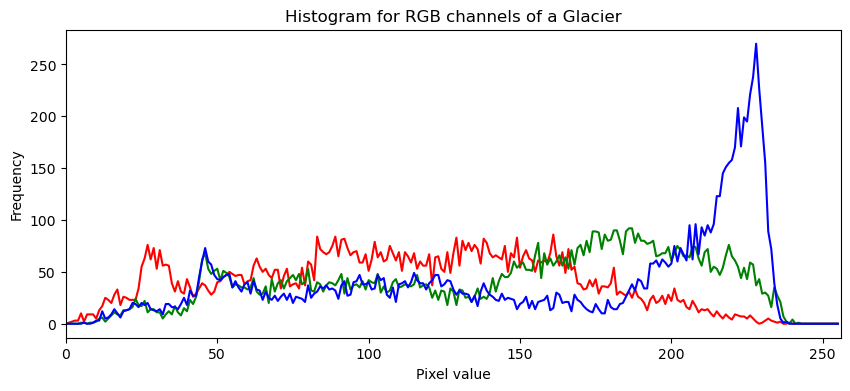

Image_path : C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Training Data\[136 179 213 ...  26  44  44]


In [13]:
# Visualization : Selecting a random image and plotting its histogram

# Selecting an image from the train_data using from a random index
random_index = np.random.randint(0, len(train_data))
random_image_filename = str(train_data[random_index])
random_image = train_data[random_index].reshape(img_size + (3,))
image_path = os.path.join(train_dir, random_image_filename)
img_label = train_labels[random_index]

# Plotting a histogram of the rgb channels of the selected image
plt.figure(figsize=(10, 4))
for i, color in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([random_image], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title(f'Histogram for RGB channels of a {img_label}')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.show()

print(f"Image_path : {image_path}")

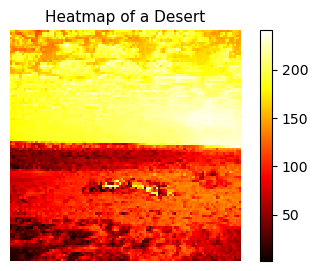

Image_path : C:\Users\KIIT\Downloads\archive\Landscape Classification\Landscape Classification\Training Data\[129 171 197 ...  37  39   9]



In [15]:
# to generate a heatmap of a random image from the training set

import matplotlib.pyplot as plt
import numpy as np
import cv2

# Select a random image from the dataset
random_index = np.random.randint(0, len(train_data))
random_image_filename = str(train_data[random_index])
random_image = train_data[random_index].reshape(img_size + (3,))
image_path = os.path.join(train_dir, random_image_filename)
img_label = train_labels[random_index]

# Creating a heatmap using the grayscale image
def generate_heatmap(image, label):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    plt.figure(figsize=(5,3))
    plt.imshow(gray_image, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title(f'Heatmap of a {label}', fontsize=11)
    plt.axis('off')
    plt.show()
    print(f"Image_path : {image_path}\n")
    
# Display the heatmap
generate_heatmap(random_image, img_label)

In [17]:
# Encoding labels to integers

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_labels_encoded = le.fit_transform(train_labels)
validation_labels_encoded = le.transform(validation_labels)

In [19]:
# Display first 10 sample encoded labels
print("Encoded training labels:", train_labels_encoded[:10])
print("Encoded validation labels:", validation_labels_encoded[:10])

Encoded training labels: [0 0 0 0 0 0 0 0 0 0]
Encoded validation labels: [0 0 0 0 0 0 0 0 0 0]


In [21]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, train_labels_encoded, test_size=0.3, random_state=42)
# X_train = train_data
# X_test = validation_data
# y_train = train_labels_encoded
# y_test = validation_labels_encoded

In [23]:
# Model Training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# Model Evaluation
from sklearn.metrics import accuracy_score
import seaborn as sns

# Prediction on the test set
y_pred = knn.predict(X_test)

In [27]:
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 54.23%


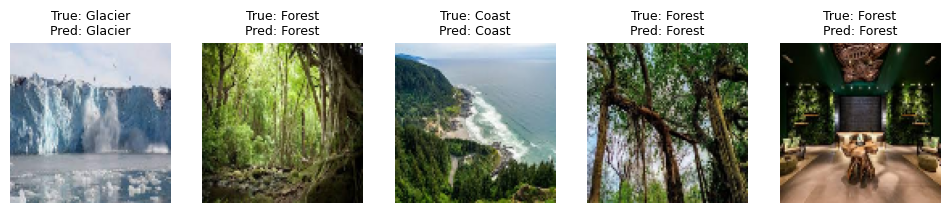

In [29]:
# Displaying predicted results
import matplotlib.pyplot as plt
def display_classified_images(X, y_true, y_pred, class_names, num_samples=5, title_fontsize=9):
    plt.figure(figsize=(12, 10))
    for i in range(num_samples):
        img = X[i].reshape(img_size + (3,))
        true_label = class_names[y_true[i]]
        pred_label = class_names[y_pred[i]]
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f'True: {true_label}\nPred: {pred_label}', fontsize=title_fontsize)
        plt.axis('off')        
    plt.show()

display_classified_images(X_test, y_test, y_pred, le.classes_, num_samples=5, title_fontsize=9)

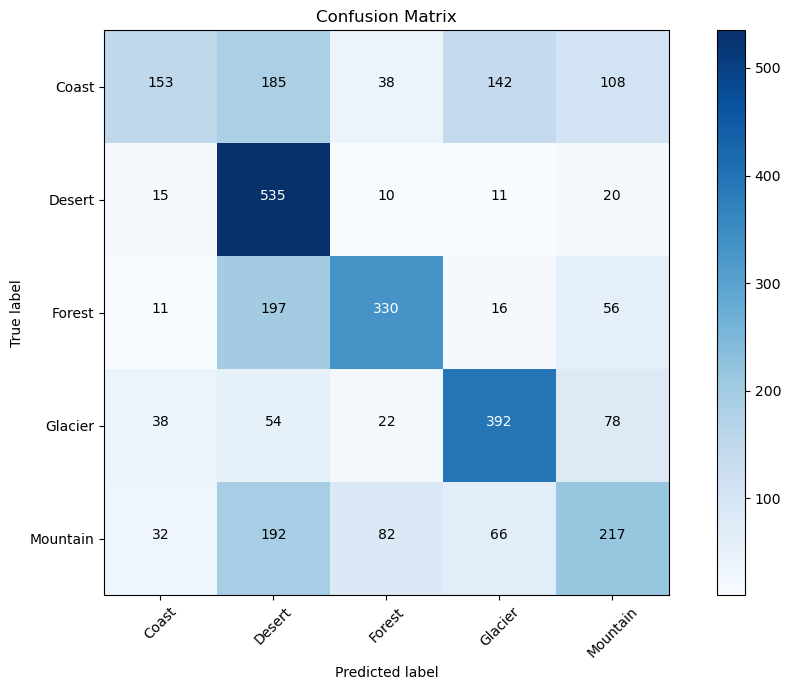

In [31]:
# Plotting confusion matrix for the true label and predicted label
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(labels)  # Assuming unique labels as class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Adding counts in the confusion matrix
# Threshold for text color
thresh = conf_matrix.max() / 2.0  
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()